In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Tahap Data Loading

Pada tahap ini, saya memuat dataset churn pelanggan menggunakan pustaka `pandas`. Dataset ini berisi data pelanggan yang digunakan untuk memprediksi apakah seorang pelanggan akan churn atau tidak. Data ini mencakup berbagai fitur seperti usia, jenis kelamin, durasi langganan, frekuensi penggunaan, dan lain-lain.

In [2]:
df = pd.read_csv("customer_churn_dataset-training-master.csv")

# Tahap Exploratory Data Analysis (EDA)

Pada tahap Exploratory Data Analysis (EDA), saya membuat berbagai visualisasi untuk memahami distribusi data dan hubungan antar fitur. Dengan EDA, kita dapat mengidentifikasi pola yang mungkin berguna untuk pemodelan prediktif.

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [5]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


# Tahap Data Cleaning

Pada tahap ini, saya membersihkan data dari nilai-nilai yang hilang, duplikat, dan anomali. Nilai yang hilang dapat menyebabkan bias dalam model, oleh karena itu perlu dihapus atau diimputasi. Selain itu, deteksi dan penghapusan data duplikat dilakukan untuk memastikan kualitas data yang akan digunakan dalam analisis lebih lanjut.

In [7]:
df = df.drop('CustomerID', axis=1)

In [8]:
df.isnull().sum()

,0
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1
Last Interaction,1


In [9]:
df.dropna(inplace=True)

In [10]:
df.duplicated().sum()

0

# Tahap Feature Engineering

Pada tahap ini, saya melakukan rekayasa fitur dengan menambahkan, mengubah, atau mengelompokkan fitur yang sudah ada agar lebih informatif bagi model. Salah satu teknik yang digunakan adalah mengonversi variabel kategorikal seperti `Gender` dan `Subscription Type` menjadi format numerik dengan menggunakan teknik encoding.

In [11]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

In [12]:
df = pd.get_dummies(df, drop_first=True)

# Tahap Splitting Data

Dataset dibagi menjadi dua bagian, yaitu training set dan test set, dengan rasio 80:20. Data training digunakan untuk melatih model, sedangkan data test digunakan untuk mengevaluasi kinerja model pada data yang belum pernah dilihat sebelumnya.

In [13]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tahap Pemodelan

Pada tahap ini, saya membangun model prediksi churn pelanggan menggunakan algoritma Random Forest Classifier. Algoritma ini bekerja dengan membangun beberapa pohon keputusan dari subset data yang berbeda dan menggabungkan hasil prediksi dari semua pohon untuk menghasilkan prediksi final yang lebih akurat.

In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [16]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Tahap Evaluasi Model

Pada tahap ini, saya mengevaluasi kinerja model dengan menggunakan cross-validation

In [19]:
y_pred = model.predict(X_test)

In [20]:
scores = cross_val_score(model, X, y, cv=5)
print(scores)
print(f"Average accuracy: {scores.mean():.4f}")

[0.99963705 0.99960303 0.9997051  0.99960302 0.99950094]
Average accuracy: 0.9996


In [23]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[38061     2]
 [   31 50073]]


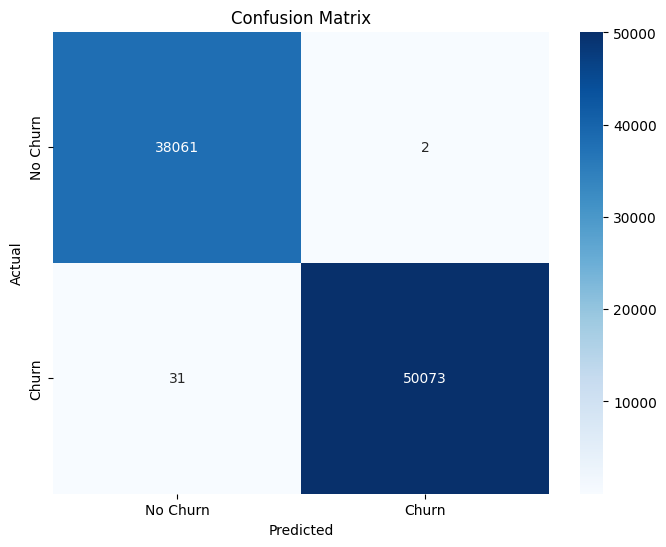

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

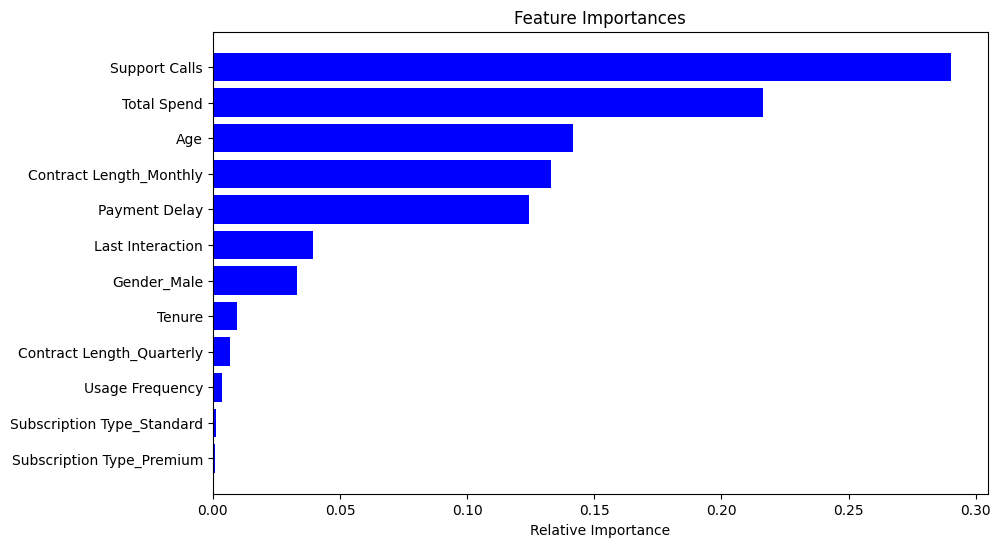

In [25]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()